In [14]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
import cv2

In [15]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = 'mannargudi_places'



In [16]:
# Function to display images
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

In [17]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [18]:
for layer in inception.layers:
    layer.trainable = False

In [19]:
folders = glob('mannargudi_places/*')
folders

['mannargudi_places\\bio fertility',
 'mannargudi_places\\CSI Church',
 'mannargudi_places\\elephant',
 'mannargudi_places\\finlay ground',
 'mannargudi_places\\finlay hostel',
 'mannargudi_places\\finlay scl',
 'mannargudi_places\\fish market',
 'mannargudi_places\\flower',
 'mannargudi_places\\ganapathi vilas scl',
 'mannargudi_places\\haridra nadhi',
 'mannargudi_places\\kaasi vishwanathar temple',
 'mannargudi_places\\kalki park',
 'mannargudi_places\\kopuram mittai',
 'mannargudi_places\\maiden colony',
 'mannargudi_places\\mannai narayanaswamy nagar',
 'mannargudi_places\\municipality',
 'mannargudi_places\\national scl',
 'mannargudi_places\\national scl ground',
 'mannargudi_places\\oil mill',
 'mannargudi_places\\old housing unit',
 'mannargudi_places\\pamani river',
 'mannargudi_places\\puthur',
 'mannargudi_places\\quaters',
 'mannargudi_places\\railway station',
 'mannargudi_places\\rajagopalaswamy temple',
 'mannargudi_places\\rukkumani kulam',
 'mannargudi_places\\saviour

In [20]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [21]:
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [22]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [23]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
# Training Generator
training_set = train_datagen.flow_from_directory('mannargudi_places',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 426 images belonging to 36 classes.


In [25]:
# Testing Generator
test_set = test_datagen.flow_from_directory('mannargudi_places',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 426 images belonging to 36 classes.


In [26]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\user\AppData\Local\Temp\ipykernel_6648\2470280257.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/100
14/14 [==============================] - 110s 8s/step - loss: 26.3330 - accuracy: 0.1925 - val_loss: 12.1190 - val_accuracy: 0.3756
Epoch 2/100
14/14 [==============================] - 83s 6s/step - loss: 8.8227 - accuracy: 0.4789 - val_loss: 3.0977 - val_accuracy: 0.7183
Epoch 3/100
14/14 [==============================] - 91s 7s/step - loss: 2.8481 - accuracy: 0.7394 - val_loss: 1.0234 - val_accuracy: 0.8756
Epoch 4/100
14/14 [==============================] - 92s 7s/step - loss: 1.7133 - accuracy: 0.8263 - val_loss: 1.2454 - val_accuracy: 0.8873
Epoch 5/100
14/14 [==============================] - 88s 6s/step - loss: 0.9556 - accuracy: 0.8732 - val_loss: 0.3502 - val_accuracy: 0.9484
Epoch 6/100
14/14 [==============================] - 89s 7s/step - loss: 0.6721 - accuracy: 0.9155 - val_loss: 0.2655 - val_accuracy: 0.9460
Epoch 7/100
14/14 [==============================] - 90s 6s/step - loss: 0.4123 - accuracy: 0.9272 - val_loss: 1.0909 - val_accuracy: 0.9343
Epoch 8/10

In [32]:
from sklearn.metrics import classification_report
predictions = model.predict(test_set)

# Convert predictions to class labels
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# Convert true labels to class labels
true_classes = test_set.classes

# Get the class labels
class_labels = list(test_set.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

14/14 [==============================] - 19s 1s/step
                            precision    recall  f1-score   support

                CSI Church       0.00      0.00      0.00         6
        Selliyamman Temple       0.00      0.00      0.00         5
             bio fertility       0.00      0.00      0.00         5
                  elephant       0.06      0.06      0.06        32
             finlay ground       0.00      0.00      0.00        11
             finlay hostel       0.00      0.00      0.00         2
                finlay scl       0.07      0.07      0.07        15
               fish market       0.00      0.00      0.00         2
                    flower       0.00      0.00      0.00         5
       ganapathi vilas scl       0.00      0.00      0.00         2
             haridra nadhi       0.07      0.07      0.07        15
 kaasi vishwanathar temple       0.00      0.00      0.00         8
                kalki park       0.00      0.00      0.00     

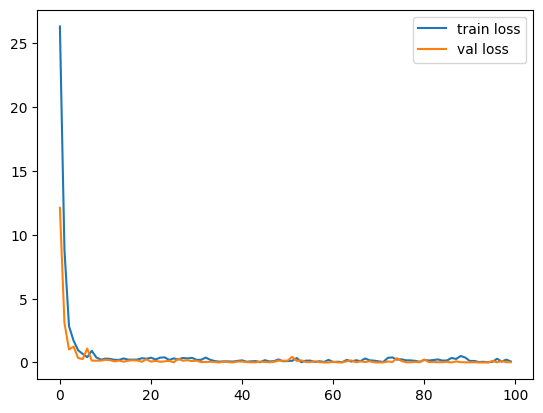

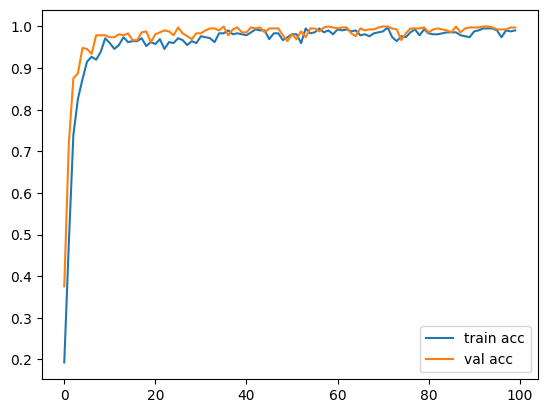

<Figure size 640x480 with 0 Axes>

In [33]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [36]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model.h5')

In [37]:
y_pred = model.predict(test_set)
y_pred

14/14 [==============================] - 19s 1s/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [38]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([17, 13, 23, 15, 25,  0,  0, 25, 20, 17, 25, 11, 23, 10, 20, 17,  6,
       25, 32, 25, 25,  4, 25, 19, 32, 10, 25, 25, 25, 24, 25, 11, 17, 19,
       11, 25, 25,  6, 27,  0, 30,  4, 17, 26,  6, 20,  8, 21, 10, 22, 25,
       31, 25, 27, 13, 24,  3, 24,  3, 17, 24, 25, 30,  3, 22, 10, 15, 25,
        2, 26,  3, 16, 11,  3, 17, 10, 16, 25, 25, 25, 13, 28, 32, 18, 25,
       14, 25, 25, 17, 24, 24, 13,  3, 23,  3, 32,  6, 33, 30,  7, 31, 16,
       25,  3, 15, 15,  6, 17, 31, 25, 21, 20, 23, 30, 24, 23, 24, 21, 16,
       25, 23,  6, 20, 24, 35, 25, 18,  0,  1,  1, 11, 10, 28, 10, 17, 25,
       18, 15, 17, 30, 25, 24, 14, 20, 24, 16, 16, 28,  3, 24,  3, 13,  3,
       32, 23, 30, 17,  0, 21, 22, 25,  6,  3, 25,  1, 21, 16,  3, 21, 10,
       16, 19, 25, 10, 17,  4, 13,  2, 25, 25, 31, 15, 13, 35, 25, 28, 25,
        5, 25, 24, 26, 25, 20, 25, 22,  2,  3, 24, 29, 21, 25, 21, 25, 11,
       26, 25, 10, 16, 25,  3, 25,  8, 25, 25,  3, 20, 24, 23, 31,  4, 25,
       21, 22, 13, 25, 25